In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(808, 766, 3)

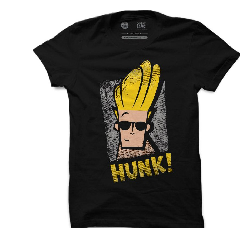

In [3]:
plt.figure()
plt.axis("off")
plt.imshow(image)

In [4]:
image.shape

(808, 766, 3)

In [5]:

image = image.reshape((image.shape[0] * image.shape[1], 3))
print image
print image.shape

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ..., 
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(618928, 3)


In [6]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print label

[0.3133773233720239, 0.5926585967996277, 0.09396407982834837]


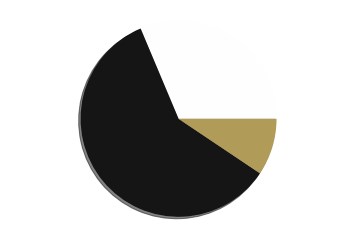

In [8]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]

plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()

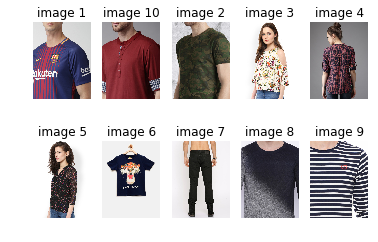

In [9]:
import os
import PIL
rows = 2
os.chdir('C:\Users\User\dominant_color_case_study\Dominant Color Data Set')
files = os.listdir('C:\Users\User\dominant_color_case_study\Dominant Color Data Set')

for num, x in enumerate(files):
    images = PIL.Image.open(x)
    plt.subplot(rows,5,num+1) 
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(images)

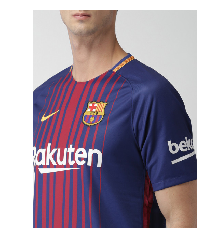

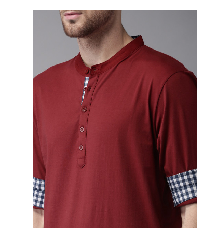

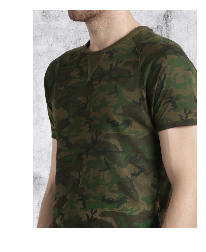

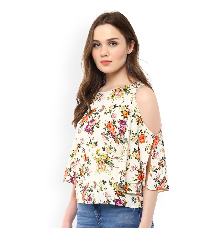

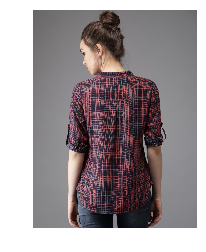

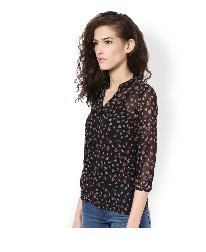

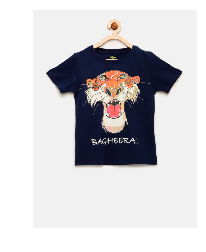

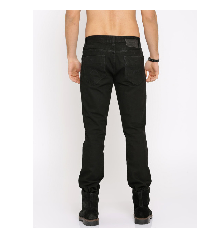

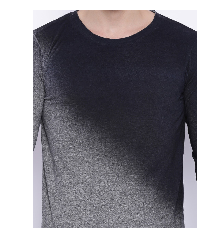

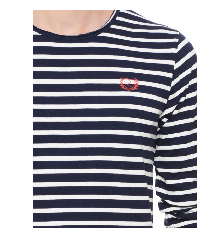

In [10]:
import glob
images = []
files = glob.glob ("C:\Users\User\dominant_color_case_study\Dominant Color Data Set/*.jpg")
for myFile in files:
    image = cv2.imread (myFile)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append (image)
    plt.figure()
    plt.axis("off")
    plt.imshow(image)

In [11]:
max_percentage = []
rgb_values = []
label = [0,0,0,0]
for i in range(len(images)):
    images[i] = images[i].reshape(images[i].shape[0] * images[i].shape[1], images[i].shape[2])
    clf = KMeans(n_clusters=K)
    clf.fit(images[i])
    for x in clf.labels_:
        label[x] += 1
    label_sum = images[i].shape[0]
    label = [float(x) / label_sum for x in label]
    m = max(label)
    ind = label.index(max(label))
    m = m*100
    max_percentage.append(m)
    colors = [[int(value) for value in row] for row in clf.cluster_centers_]
    rgb_values.append(colors[ind])

In [12]:
print(max_percentage)
print(rgb_values)

[47.187174479166664, 48.77586974991692, 59.270278655404205, 67.97154710377167, 63.122125076862325, 59.25753561091922, 71.48375523528122, 65.16266759034906, 56.88967784250792, 58.6113750375727]
[[48, 50, 91], [133, 46, 52], [48, 49, 35], [251, 250, 248], [140, 134, 136], [251, 251, 250], [240, 239, 238], [237, 234, 235], [40, 39, 49], [44, 45, 64]]


In [13]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

#requested_colour = (119, 172, 152)
color_name = []
for i in rgb_values:
    actual_name, closest_name = get_colour_name(i)
    print("Actual colour name:", actual_name, ", closest colour name:", closest_name)
    color_name.append(closest_name)

('Actual colour name:', None, ', closest colour name:', u'darkslategray')
('Actual colour name:', None, ', closest colour name:', u'brown')
('Actual colour name:', None, ', closest colour name:', u'darkslategray')
('Actual colour name:', None, ', closest colour name:', u'snow')
('Actual colour name:', None, ', closest colour name:', u'grey')
('Actual colour name:', None, ', closest colour name:', u'snow')
('Actual colour name:', None, ', closest colour name:', u'whitesmoke')
('Actual colour name:', None, ', closest colour name:', u'linen')
('Actual colour name:', None, ', closest colour name:', u'darkslategray')
('Actual colour name:', None, ', closest colour name:', u'darkslategray')


In [16]:
list_of_tuple = list(zip(color_name,max_percentage))
list_of_list = [list(x) for x in list_of_tuple]

In [17]:
m = 0;
avg_p = []
col = []
for i in list_of_list:
    c = 0
    avg = 0
    l = i[0]
    if l not in col:
        for j in list_of_list:
            if(l==j[0]):
                avg += j[1]
                c += 1
        m = avg/c
        print(m)
        avg_p.append(m)
        col.append(l)
    
print(col)


55.4896265037
48.7758697499
63.6145413573
63.1221250769
71.4837552353
65.1626675903
[u'darkslategray', u'brown', u'snow', u'grey', u'whitesmoke', u'linen']


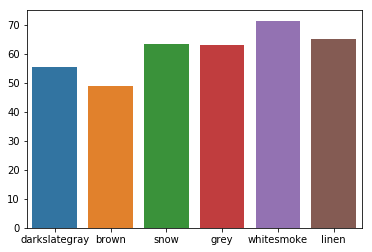

In [18]:

import seaborn as sns
sns.barplot(col, avg_p)